# HW3 - 中文詞頻統計
#### 【Python人工智慧實戰_2020-04-29】

### Read Speech.txt file, use jieba to do word segmentation and do word frequency on each word

In [1]:
import jieba
import json

In [2]:
ret = open("./speech.txt", "r").read().strip()
# print(ret)

## write your code here

# 斷詞
words = jieba.cut(ret, cut_all=False)

# 詞頻統計
word_freq = {}
for word in words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1
print(word_freq)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 1.512 seconds.
Prefix dict has been built successfully.


{'如果': 4, '你': 22, '受邀': 2, '在': 8, '一場': 1, '研討會': 1, '或': 4, '活動裡': 1, '演講': 17, '，': 80, '很': 4, '可能': 3, '是': 7, '因為': 3, '已': 2, '展現': 1, '某個': 2, '領域': 1, '的': 63, '專業': 3, '。': 24, '為': 1, '了': 2, '讓': 5, '觀眾': 1, '有': 4, '絕佳': 1, '體驗': 1, '通常': 2, '會': 6, '把': 4, '重心': 1, '放在': 1, '主辦': 3, '人': 9, '指定': 1, '主題': 3, '也': 6, '就是': 2, '中': 2, '「': 3, '最精華': 1, '」': 3, '部分': 2, '但': 4, '每次': 1, '都講': 1, '完全': 2, '一樣': 2, '內容': 19, '就': 9, '碰到': 1, '麻煩': 1, '：': 1, '有些': 2, '聽眾': 14, '對': 3, '比較': 1, '有共鳴': 1, '另': 2, '一些': 5, '沒什麼': 1, '感覺': 1, '；': 1, '之前': 3, '聽過': 1, '再': 1, '聽': 1, '到': 3, '感到': 2, '無聊': 2, '\n': 16, '那麼': 1, '該': 1, '如何': 2, '達到': 1, '最佳': 1, '平衡': 2, '並': 1, '有效': 1, '地': 3, '不同': 2, '發表類': 1, '似內容': 1, '？': 1, '身為': 1, '專業演': 1, '講人': 1, '我': 13, '每年': 1, '都': 2, '進行': 1, '三十': 1, '至': 1, '五十': 1, '場有': 1, '酬勞': 1, '以下': 1, '提供': 1, '從': 1, '過往': 1, '經驗': 1, '發現': 2, '三個': 1, '策略': 2, '可協助': 1, '打造': 1, '成功': 2, '背景': 2, '各異': 1, '能產': 1, '生共鳴': 1, '首先': 1, 

In [3]:
# 排序詞頻統計結果
sort = sorted(word_freq.items(), key = lambda x:x[1], reverse = True) # sort 為 list
print(sort[:50])  # 輸出前 50

[('，', 80), ('的', 63), ('。', 24), ('你', 22), ('內容', 19), ('演講', 17), ('\n', 16), ('聽眾', 14), ('我', 13), ('人', 9), ('就', 9), ('在', 8), ('來', 8), ('是', 7), ('他們', 7), ('會', 6), ('也', 6), ('或是', 6), ('這些', 6), ('讓', 5), ('一些', 5), ('模組', 5), ('更', 5), ('如果', 4), ('或', 4), ('很', 4), ('有', 4), ('把', 4), ('但', 4), ('標準', 4), ('他', 4), ('與', 4), ('可能', 3), ('因為', 3), ('專業', 3), ('主辦', 3), ('主題', 3), ('「', 3), ('」', 3), ('對', 3), ('之前', 3), ('到', 3), ('地', 3), ('運用', 3), ('可以', 3), ('符合', 3), ('能', 3), ('了解', 3), ('特別', 3), ('發', 3)]


In [4]:
import csv

with open("count.csv", "w", encoding='utf-8-sig', newline="") as fd:
    ## write your code here
    writer = csv.writer(fd)
    writer.writerow(['word', 'count'])
    writer.writerows(word_freq.items())

### Use wordcloud to show the word frequency in the file "speech.txt"

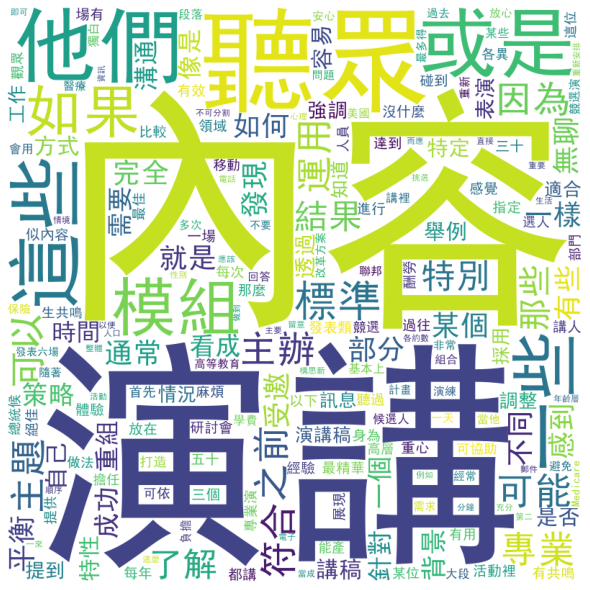

In [5]:
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 

## write your code here
words = " ".join(jieba.cut(ret, cut_all=False))

## show chinese in wordcloud: use WordCloud(font_path='simhei.ttf', ......)
wordcloud = WordCloud(width = 800, height = 800, 
                      font_path='simhei.ttf',
                      background_color ='white',
                      stopwords = None,
                      min_font_size = 10).generate(words)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [6]:
# 查看文字雲的字詞出現頻率
process_word = WordCloud.process_text(wordcloud, words)
        
# 排序文字雲結果
sort = sorted(process_word.items(), key=lambda e:e[1], reverse=True) # sort 為 list
print(sort[:50])  # 輸出前 50

[('內容', 19), ('演講', 17), ('聽眾', 14), ('他們', 7), ('或是', 6), ('這些', 6), ('一些', 5), ('模組', 5), ('如果', 4), ('標準', 4), ('可能', 3), ('因為', 3), ('專業', 3), ('主辦', 3), ('主題', 3), ('之前', 3), ('運用', 3), ('可以', 3), ('符合', 3), ('了解', 3), ('特別', 3), ('那些', 3), ('結果', 3), ('受邀', 2), ('某個', 2), ('通常', 2), ('就是', 2), ('部分', 2), ('完全', 2), ('一樣', 2), ('有些', 2), ('感到', 2), ('無聊', 2), ('如何', 2), ('平衡', 2), ('不同', 2), ('發現', 2), ('策略', 2), ('成功', 2), ('背景', 2), ('一個', 2), ('看成', 2), ('需要', 2), ('重組', 2), ('溝通', 2), ('針對', 2), ('像是', 2), ('時間', 2), ('自己', 2), ('講稿', 2)]


In [7]:
# 取出頻率為 1 的詞，重新產生文字雲比照結果
userdict = []
for word, freq in word_freq.items():
    if(freq == 1):
        userdict.append(word)
# print(userdict)

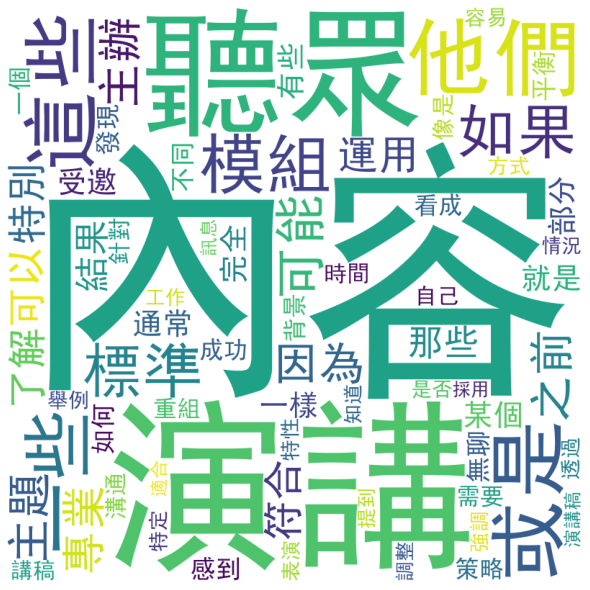

In [8]:
## write your code here
stopwords = set(userdict)

## show chinese in wordcloud: use WordCloud(font_path='simhei.ttf', ......)
wordcloud = WordCloud(width = 800, height = 800, 
                      font_path='simhei.ttf',
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(words)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()